In [162]:
import os
import numpy as np
import pandas as pd
import cv2
import re
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import imagehash
from scipy.stats import sem, median_abs_deviation, percentileofscore, gaussian_kde

pd.set_option('display.max_colwidth', 300)

import scienceplots
from cmap import Colormap

plt.style.use(['science', 'grid'])

In [2]:
dataset_dir = "../datasets/FDP"
# hashes_dir = "hashes"

In [3]:
img_filenames = []


In [324]:
hashfunc = imagehash.average_hash

i = 0
hash_index = {}
counts = {"hash": [], "count": []}
code_hash = {}

for code in os.listdir(dataset_dir):
    img_path = os.path.join(dataset_dir, code, code + "_+0+0+0.png")
    img = Image.open(img_path)
    
    hash = hashfunc(img, hash_size=16)
    code_hash[code] = str(hash)
    
    if hash not in hash_index:
        hash_index[hash] = i
        counts["hash"].append(hash)
        counts["count"].append(1)
        i += 1
    else:
        counts["count"][hash_index[hash]] += 1
    
    # p = Path(os.path.join("hashes_16x16_structure", str(hash)))
    # p.mkdir(parents=True, exist_ok=True)
    # img.save(os.path.join(p, str(code) + ".png"))

In [325]:
def code_to_hash(code):
    return str(code_hash[str(int(code))])

## analysis

In [326]:
df = pd.DataFrame(counts)
df

,hash,count
0,06600ff007e007e047e2fffffe7f7c3e7c3efe7fffff47e207e007e00ff00660,11
1,000007e00ff01ff83ffc7ffe7ffe7ffe7ffe7ffe7ffe3ffc1ff80ff007e00000,78
2,0ff00ff01ff833cce3c7e3c7ffffffffffffffffe3c7e3c733cc1ff80ff00ff0,1
3,1ff83c3cfc3f9c391ff8fffffffff81ff81fffffffff1ff89c39fc3f3c3c1ff8,1
4,13c89189f81ff81f381c3dbcfffffe7ffe7fffff3dbc381cf81ff81f918913c8,1
...,...,...
5765,7ffeffffec37c003e007e007c003c003c003c003e007e007c003ec37ffff7ffe,1
5766,381c381cfc3fffffffff3ffc1ff81e781e781ff83ffcfffffffffc3f381c381c,1
5767,066037ec7ffe7e7e3c3cfe7ff42f60066006f42ffe7f3c3c7e7e7ffe37ec0660,1
5768,2664724efa5f7ffe3ffcbffdffff1e781e78ffffbffd3ffc7ffefa5f724e2664,1


In [327]:
df.sort_values("count", ascending=False)

,hash,count
28,03c0018003c003c003c003c0bffdffffffffbffd03c003c003c003c0018003c0,567
189,03c003c003c003c00ff00ff0ffffffffffffffff0ff00ff003c003c003c003c0,238
169,0180018003c003c007e00ff03ffcffffffff3ffc0ff007e003c003c001800180,171
250,0180018003c003c003c007e03ffcffffffff3ffc07e003c003c003c001800180,166
190,03c003c003c013c80ff00ff0ffffffffffffffff0ff00ff013c803c003c003c0,155
...,...,...
2628,c003c7e30ff01e783e7c7c3e781e60066006781e7c3e3e7c1e780ff0c7e3c003,1
2627,8241066006600e701e787ffeffffc7e3c7e3ffff7ffe1e780e70066006608241,1
2626,1ff81ff83ffc3ffc7e7e3c3c381c00000000381c3c3c7e7e3ffc3ffc1ff81ff8,1
2625,3e7c7ffefffffffffffff81ff81f781e781ef81ff81fffffffffffff7ffe3e7c,1


[1547, 822, 584, 460, 313, 299, 256, 198, 185, 181, 172, 166, 161, 129, 127, 127, 118, 111, 102, 81, 80, 75, 72, 69, 67, 63, 57, 57, 56, 50, 49, 49, 48, 46, 45, 42, 42, 42, 40, 39, 38, 38, 38, 37, 35, 35, 35, 35, 35, 34, 33, 32, 32, 32, 31, 31, 31, 30, 30, 29, 29, 28, 28, 27, 26, 25, 25, 25, 24, 24, 24, 24, 24, 24, 23, 23, 23, 22, 22, 22, 22, 21, 21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 

[Text(0, 0.5, 'Cluster size'), Text(0.5, 0, 'Cluster index')]

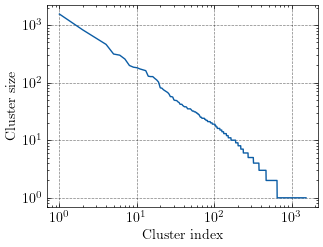

In [207]:
ys = df.sort_values("count", ascending=False)["count"].to_list()
print(ys)
fig, ax = plt.subplots()
ax.plot(range(1, len(ys)+1), ys)
ax.set_yscale('log', base=10)
ax.set_xscale('log', base=10)
pparam = dict(ylabel=r'Cluster size', xlabel=r'Cluster index')
ax.set(**pparam)

In [318]:
dataset_dir = "../datasets/FDP"

df = pd.read_csv("data_pattern_MSE.csv")

sg = pd.read_csv("space_groups.csv")

df = df.loc[df.phase.str.match('(test|val)')]
# Use epoch 100
df = df.loc[df.epoch == 100]
# Use numbers to take average
df_num = df.select_dtypes(include="number")
df_num = df_num.groupby('code').mean().reset_index()

In [18]:
codes = list(sg["ICSD_code"].unique())

lattice_parameters = {}
for i, code in enumerate(codes):
    input_path = os.path.join(dataset_dir, str(code), str(code) + ".cif")
    for line in open(input_path):
        match = re.search(r'_cell_length_a\s+([\d.]+)', line)
        if match:
            lattice_parameters[code] = match.group(1)
            break

chemical_formulas = {}
for i, code in enumerate(codes):
    input_path = os.path.join(dataset_dir, str(code), str(code) + ".cif")
    with open(input_path, 'r') as file:
        data = file.read()
        # Regular expression patterns
        pattern1 = r'_chemical_formula_sum\s*;([^;]+);'
        pattern2 = r'_chemical_formula_sum\s*(?:\'|\"|\s)(.*?)(?:\'|\"|\s|\n|$)'
        match1 = re.search(pattern1, data)
        match2 = re.search(pattern2, data)

        if match1:
            chemical_formula_sum = match1.group(1).strip()
            chemical_formula_sum = chemical_formula_sum.replace("\n", " ")
            chemical_formulas[code] = chemical_formula_sum
        elif match2:
            chemical_formula_sum = match2.group(1).strip()
            chemical_formulas[code] = chemical_formula_sum
        else:
            print(code)

def lattice_parameter(code):
    return float(lattice_parameters[code])

def chemical_formula(code):
    return chemical_formulas[code]

In [328]:
sg["chemical_formula"] = sg.apply(lambda x: chemical_formula(x["ICSD_code"]), axis=1)
sg["hash"] = sg.apply(lambda x: code_to_hash(x["ICSD_code"]), axis=1)
print(len(sg.groupby('chemical_formula')))
print(len(sg.groupby('hash')))

3754
5770


In [329]:
df_num

,code,Unnamed: 0,index,epoch,MSE,chemical_formula,hash
0,16,"218,146.00000","93,606.00000",100.00000,0.01648,Cu1,f01ff80e001ff800807ffe01c07ffe03c07ffe03e03ffc07701ff80e381ff81c381ff81c381ff81c103ffc08e07ffe07f1fe7f8ffffc3ffffffc3ffffffc3ffffffc3ffffffc3ffffffc3ffff1fe7f8fe07ffe07103ffc08381ff81c381ff81c381ff81c701ff80ee03ffc07c07ffe03c07ffe03807ffe01001ff800701ff80e
1,25,"305,687.00000","181,147.00000",100.00000,0.00090,Ag8,ffc003ffdff00ffbbff81ffdfe7c3e7ffc7ffe3ff9ffff9ff3ffffcfe7ffffe7e7fc3fe7fff00fff7fe007fe7fc003fe3f8001fc1f8001f80f0000f00f0000f00f0000f00f0000f01f8001f83f8001fc7fc003fe7fe007fefff00fffe7fc3fe7e7ffffe7f3ffffcff9ffff9ffc7ffe3ffe7c3e7fbff81ffddff00ffbffc003ff
2,93,"433,969.00000","309,429.00000",100.00000,0.01628,H15,000000000000000000000000000ff000003ffc0000ffff0001ffff8003ffffc007ffffe007ffffe00ffffff00ffffff01ffffff81ffffff81ffffff81ffffff81ffffff81ffffff81ffffff81ffffff80ffffff00ffffff007ffffe007ffffe003ffffc001ffff8000ffff00003ffc00000ff000000000000000000000000000
3,119,"431,775.66667","307,235.66667",100.00000,0.00975,H3.5,3e00007c3f0000fcff8001fffffc3ffffffc3ffffffc3ffffffc3fff7ffc3ffe3ffe7ffc1ffe7ff81ffe7ff81ffe7ff81ffc3ff81ff81ff800f00f00000000000000000000f00f001ff81ff81ffc3ff81ffe7ff81ffe7ff81ffe7ff83ffe7ffc7ffc3ffefffc3ffffffc3ffffffc3ffffffc3fffff8001ff3f0000fc3e00007c
4,121,"246,002.00000","121,462.00000",100.00000,0.01030,H3.5,3e00007c1f0000f89ff81ff9fff81ffff7fc3feffffc3ffffffc3fff7efe7f7e3f7e7efc3ffc3ffc3ffc3ffc3ffc3ffc3ff81ffc0ff00ff0018001800000000000000000018001800ff00ff03ff81ffc3ffc3ffc3ffc3ffc3ffc3ffc3f7e7efc7efe7f7efffc3ffffffc3ffff7fc3feffff81fff9ff81ff91f0000f83e00007c
...,...,...,...,...,...,...,...
11059,759462,"476,360.00000","351,820.00000",100.00000,0.00274,C16,00000000000000000000000000000000000000000003c000001ff800003ffc0000ffff0000ffff0001ffff8003ffffc003ffffc003ffffc007ffffe007ffffe007ffffe007ffffe003ffffc003ffffc003ffffc001ffff8000ffff0000ffff00003ffc00001ff8000003c0000000000000000000000000000000000000000000
11060,759650,"499,175.00000","374,635.00000",100.00000,0.00008,In2.72,00000000000240000003c0000003c0000007e0000007e000000ff000001ff800007ffe0000ffff0000ffff0001ffff8003ffffc00ffffff07ffffffe3ffffffc3ffffffc7ffffffe0ffffff003ffffc001ffff8000ffff0000ffff00007ffe00001ff800000ff0000007e0000007e0000003c0000003c0000002400000000000
11061,759651,"496,065.00000","371,525.00000",100.00000,0.00038,H43.52,000000000000000000000000000ff000003ffc0000ffff0001ffff8003ffffc007ffffe007ffffe00ffffff00ffffff01ffffff81ffffff81ffffff81ffffff81ffffff81ffffff81ffffff81ffffff80ffffff00ffffff007ffffe007ffffe003ffffc001ffff8000ffff00003ffc00000ff000000000000000000000000000
11062,759652,"589,486.00000","464,946.00000",100.00000,0.00185,H43.52,000000000000000000000000000ff000007ffe0000ffff0001ffff8003ffffc007ffffe00ffffff00ffffff00ffffff01ffffff81ffffff81ffffff81ffffff81ffffff81ffffff81ffffff81ffffff80ffffff00ffffff00ffffff007ffffe003ffffc001ffff8000ffff00007ffe00000ff000000000000000000000000000


In [330]:
df_num["chemical_formula"] = df_num.apply(lambda x: chemical_formula(x["code"]), axis=1)
df_num["hash"] = df_num.apply(lambda x: code_to_hash(x["code"]), axis=1)
df_num.to_csv("chemical_formulas.csv")
df_num

,code,Unnamed: 0,index,epoch,MSE,chemical_formula,hash
0,16,"218,146.00000","93,606.00000",100.00000,0.01648,Cu1,07e08ff187e147e267e687e1fe7ffe7ffe7ffe7f87e167e647e287e18ff107e0
1,25,"305,687.00000","181,147.00000",100.00000,0.00090,Ag8,fc3ffe7feff7dffbfc3ff81f700e300c300c700ef81ffc3fdffbeff7fe7ffc3f
2,93,"433,969.00000","309,429.00000",100.00000,0.01628,H15,000001800ff01ff83ffc3ffc3ffc7ffe7ffe3ffc3ffc3ffc1ff80ff001800000
3,119,"431,775.66667","307,235.66667",100.00000,0.00975,H3.5,700efa5ffe7ffe7f7e7e3e7c7e7e000000007e7e3e7c7e7efe7ffe7ffa5f700e
4,121,"246,002.00000","121,462.00000",100.00000,0.01030,H3.5,700ebc3dfe7ffe7f7e7e7e7e3e7c000000003e7c7e7e7e7efe7ffe7fbc3d700e
...,...,...,...,...,...,...,...
11059,759462,"476,360.00000","351,820.00000",100.00000,0.00274,C16,00000000000007e00ff01ff81ff81ff81ff81ff81ff80ff007e0000000000000
11060,759650,"499,175.00000","374,635.00000",100.00000,0.00008,In2.72,0000018003c003c00ff00ff03ffc7ffe7ffe3ffc0ff00ff003c003c001800000
11061,759651,"496,065.00000","371,525.00000",100.00000,0.00038,H43.52,000001800ff01ff83ffc3ffc3ffc7ffe7ffe3ffc3ffc3ffc1ff80ff001800000
11062,759652,"589,486.00000","464,946.00000",100.00000,0.00185,H43.52,000001800ff01ff83ffc3ffc3ffc7ffe7ffe3ffc3ffc3ffc1ff80ff001800000


In [314]:
import scipy.stats as ss

def cramers_corrected_stat(columnA, columnB):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    confusion_matrix = pd.crosstab(columnA, columnB)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.to_numpy().sum(axis=None)
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))


def compute_category_correlation(df):
    """ Compute the correlation between string columns of a DataFrame
    """
    for column in df.columns:
        df.loc[:, column] = df[column].astype('category').cat.codes
    result = df.corr(method=cramers_corrected_stat)
    return result.style.background_gradient(cmap='Reds')

compute_category_correlation(df_num[["hash", "chemical_formula"]])

,hash,chemical_formula
hash,1.000000,0.000000
chemical_formula,0.000000,1.000000


In [331]:
df_num

,code,Unnamed: 0,index,epoch,MSE,chemical_formula,hash
0,16,"218,146.00000","93,606.00000",100.00000,0.01648,Cu1,07e08ff187e147e267e687e1fe7ffe7ffe7ffe7f87e167e647e287e18ff107e0
1,25,"305,687.00000","181,147.00000",100.00000,0.00090,Ag8,fc3ffe7feff7dffbfc3ff81f700e300c300c700ef81ffc3fdffbeff7fe7ffc3f
2,93,"433,969.00000","309,429.00000",100.00000,0.01628,H15,000001800ff01ff83ffc3ffc3ffc7ffe7ffe3ffc3ffc3ffc1ff80ff001800000
3,119,"431,775.66667","307,235.66667",100.00000,0.00975,H3.5,700efa5ffe7ffe7f7e7e3e7c7e7e000000007e7e3e7c7e7efe7ffe7ffa5f700e
4,121,"246,002.00000","121,462.00000",100.00000,0.01030,H3.5,700ebc3dfe7ffe7f7e7e7e7e3e7c000000003e7c7e7e7e7efe7ffe7fbc3d700e
...,...,...,...,...,...,...,...
11059,759462,"476,360.00000","351,820.00000",100.00000,0.00274,C16,00000000000007e00ff01ff81ff81ff81ff81ff81ff80ff007e0000000000000
11060,759650,"499,175.00000","374,635.00000",100.00000,0.00008,In2.72,0000018003c003c00ff00ff03ffc7ffe7ffe3ffc0ff00ff003c003c001800000
11061,759651,"496,065.00000","371,525.00000",100.00000,0.00038,H43.52,000001800ff01ff83ffc3ffc3ffc7ffe7ffe3ffc3ffc3ffc1ff80ff001800000
11062,759652,"589,486.00000","464,946.00000",100.00000,0.00185,H43.52,000001800ff01ff83ffc3ffc3ffc7ffe7ffe3ffc3ffc3ffc1ff80ff001800000


In [310]:
cfs = list(sg["chemical_formula"].unique())

def probability_same_hash(hashes):
    hash_counts = {}
    total_hashes = len(hashes)
    
    for hash in hashes:
        hash = str(hash)
        hash_counts[hash] = len([h for h in hashes if h == hash])
    
    probability = 0
    for count in hash_counts.values():
        probability += (count * (count - 1)) / (total_hashes * (total_hashes - 1))
    
    return probability

probabilities = []
for cf in cfs:
    same_cf = sg[sg["chemical_formula"] == cf]
    no_of_cf = len(same_cf)
    if no_of_cf == 1:
        continue
    p = probability_same_hash(list(same_cf["hash"]))
    for _ in range(no_of_cf):
        probabilities.append(p)

print(probabilities)
print(np.mean(probabilities))

[0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.007729468599033817, 0.0077294

In [332]:
# df_dupes = df_num.groupby('chemical_formula').mean().reset_index()
df_dupes = df_num.drop("chemical_formula", axis=1).groupby('hash').mean().reset_index()
df_dupes

,hash,code,Unnamed: 0,index,epoch,MSE
0,000000000000000003c007e00ff00ff00ff00ff007e003c00000000000000000,"204,620.12500","457,035.40625","332,495.40625",100.00000,0.23962
1,000000000000000007e00ff00ff00ff00ff00ff00ff007e00000000000000000,"208,721.82353","375,730.62745","251,190.62745",100.00000,0.05283
2,000000000000018007e00ff00ff01ff81ff80ff00ff007e00180000000000000,"220,030.84375","399,474.84375","274,934.84375",100.00000,0.05163
3,00000000000001800ff00ff00ff01ff81ff80ff00ff00ff00180000000000000,"168,089.66667","471,106.49074","346,566.49074",100.00000,0.00105
4,00000000000003c007e00ff01ff81ff81ff81ff80ff007e003c0000000000000,"222,973.78125","428,791.53073","304,251.53073",100.00000,0.08809
...,...,...,...,...,...,...
5234,fffffffffffffffffffff00ff00fe007e007f00ff00fffffffffffffffffffff,"417,040.00000","246,699.50000","122,159.50000",100.00000,0.14120
5235,fffffffffffffffffffff81fe007e007e007e007f81fffffffffffffffffffff,"85,755.00000","368,511.00000","243,971.00000",100.00000,0.05234
5236,fffffffffffffffffffff81ff81ff81ff81ff81ff81fffffffffffffffffffff,"25,719.00000","125,051.00000",511.00000,100.00000,0.04464
5237,fffffffffffffffffffffc3ff81fe007e007f81ffc3fffffffffffffffffffff,"164,403.00000","400,258.75000","275,718.75000",100.00000,0.00316


In [333]:
d = {
    '': ['Mean', 'SEM', 'Median', 'MAD'],
    'With duplicates': [np.mean(df_num["MSE"]), sem(df_num["MSE"]), np.median(df_num["MSE"]), median_abs_deviation(df_num["MSE"])],
    'Without duplicates': [np.mean(df_dupes["MSE"]), sem(df_dupes["MSE"]), np.median(df_dupes["MSE"]), median_abs_deviation(df_dupes["MSE"])],
}
pd.options.display.float_format = "{:,.5f}".format
table = pd.DataFrame(data=d)
print(table.T)

                         0       1       2       3
                      Mean     SEM  Median     MAD
With duplicates    0.01817 0.00046 0.00197 0.00186
Without duplicates 0.02507 0.00067 0.00648 0.00595
